In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/sanding28/dataset/main/healthcare_dataset.csv")

In [5]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [7]:
print("Number Of Duplicated data: ", df.duplicated().sum())

Number Of Duplicated data:  0


In [8]:
df.describe(include="all")

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000.000000,10000,10000,10000,10000,10000,10000,10000,10000.000000,10000.000000,10000,10000,10000,10000
unique,9378,NaN,2,8,6,1815,9416,8639,5,NaN,NaN,3,1834,5,3
top,Michael Johnson,NaN,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,NaN,NaN,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,NaN,5075,1275,1708,15,7,19,2040,NaN,NaN,3391,14,2079,3456
mean,NaN,51.452200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25516.806778,300.082000,NaN,NaN,NaN,NaN
std,NaN,19.588974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14067.292709,115.806027,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.180837,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13506.523967,199.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25258.112566,299.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37733.913727,400.000000,NaN,NaN,NaN,NaN


In [9]:
df['Test Results'].unique()

array(['Inconclusive', 'Normal', 'Abnormal'], dtype=object)

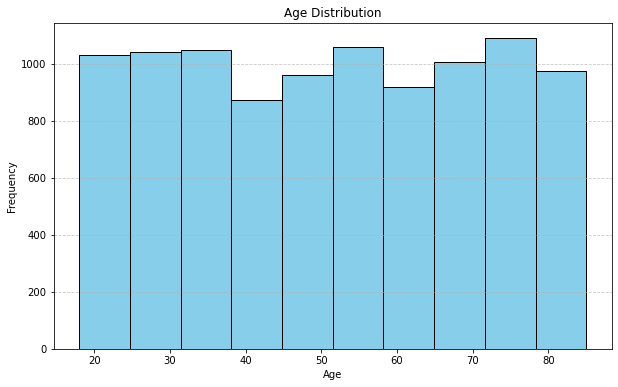

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

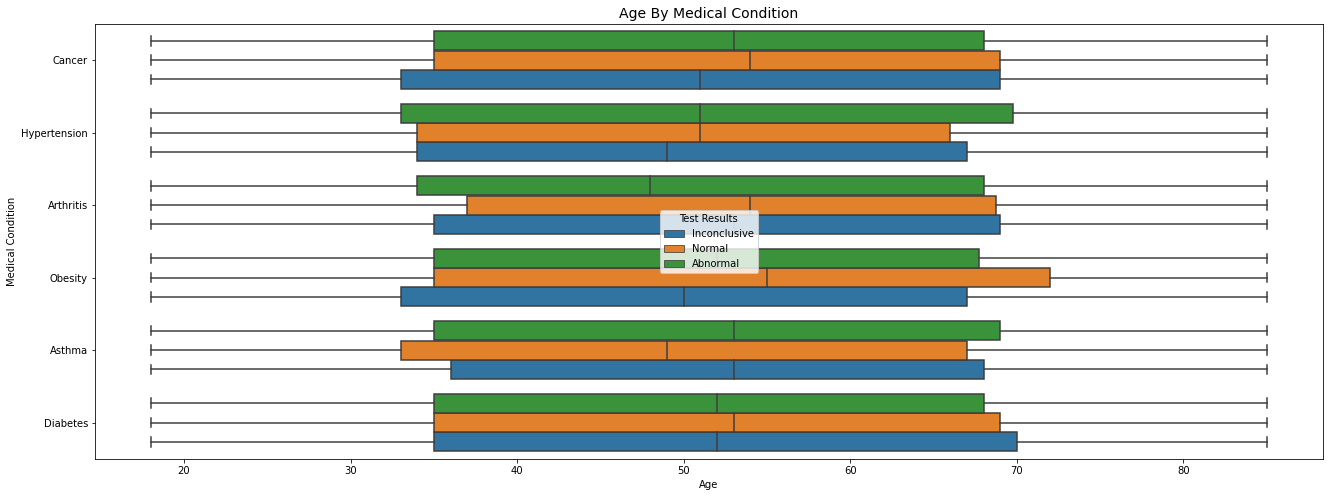

In [11]:
fig, ax = plt.subplots(figsize=(22, 8))
sns.boxplot(data=df, x='Age', y='Medical Condition', hue='Test Results', orient='h', ax=ax)
ax.invert_yaxis()
ax.set_title('Age By Medical Condition', fontsize='14')
plt.show()

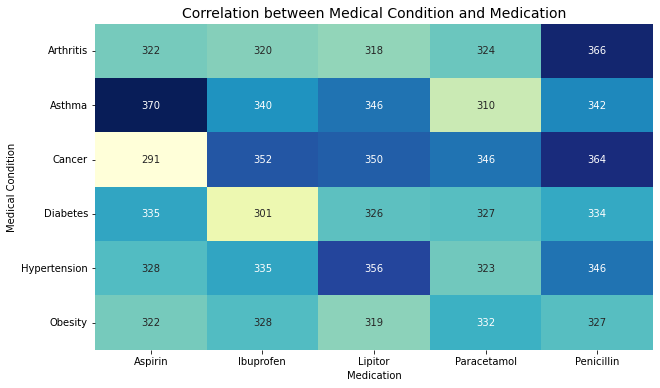

In [12]:
contingency_table = pd.crosstab(df['Medical Condition'], df['Medication'])

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='g', cbar=False)
plt.title('Correlation between Medical Condition and Medication', fontsize=14)
plt.xlabel('Medication')
plt.ylabel('Medical Condition')

plt.show()

## Modelling

### choose features

In [13]:
df = df[[ 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']]
df.head()

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results
0,81,Female,O-,Diabetes,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,Urgent,Paracetamol,Normal


In [14]:
df = df.rename(columns={'Age': 'age',
                        'Gender': 'gender',
                        'Blood Type': 'blood_type',
                        'Medical Condition': 'medical_condition',
                        'Admission Type': 'admission_type',
                        'Medication': 'medication',
                        'Test Results': 'test_result'})

In [15]:
df.head()

,age,gender,blood_type,medical_condition,admission_type,medication,test_result
0,81,Female,O-,Diabetes,Elective,Aspirin,Inconclusive
1,35,Male,O+,Asthma,Emergency,Lipitor,Normal
2,61,Male,B-,Obesity,Emergency,Lipitor,Normal
3,49,Male,B-,Asthma,Urgent,Penicillin,Abnormal
4,51,Male,O-,Arthritis,Urgent,Paracetamol,Normal


In [16]:
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

for column, values in unique_values.items():
    print(f'Unique values for {column}: {values}')

Unique values for age: [81 35 61 49 51 41 82 55 33 39 45 23 85 72 65 32 64 66 80 79 54 26 70 74
 56 37 78 83 30 19 46 48 34 84 47 60 57 21 27 68 31 42 71 38 28 43 69 73
 67 44 20 59 76 40 36 29 53 77 24 75 25 62 52 50 22 63 58 18]
Unique values for gender: ['Female' 'Male']
Unique values for blood_type: ['O-' 'O+' 'B-' 'AB+' 'A+' 'AB-' 'A-' 'B+']
Unique values for medical_condition: ['Diabetes' 'Asthma' 'Obesity' 'Arthritis' 'Hypertension' 'Cancer']
Unique values for admission_type: ['Elective' 'Emergency' 'Urgent']
Unique values for medication: ['Aspirin' 'Lipitor' 'Penicillin' 'Paracetamol' 'Ibuprofen']
Unique values for test_result: ['Inconclusive' 'Normal' 'Abnormal']


### label encoder

In [17]:
string_columns = ['gender', 'blood_type', 'medical_condition', 'admission_type', 'medication', 'test_result']

label_encoder = LabelEncoder()

for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
df.head()

,age,gender,blood_type,medical_condition,admission_type,medication,test_result
0,81,0,7,3,0,0,1
1,35,1,6,1,1,2,2
2,61,1,5,5,1,2,2
3,49,1,5,1,2,4,0
4,51,1,7,0,2,3,2


In [19]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df.head()

,age,gender,blood_type,medical_condition,admission_type,medication,test_result
0,1.508465,0,7,3,0,0,1
1,-0.839912,1,6,1,1,2,2
2,0.487431,1,5,5,1,2,2
3,-0.125189,1,5,1,2,4,0
4,-0.023086,1,7,0,2,3,2


In [21]:
X = df.drop('test_result', axis=1)
y = df[['test_result']]


y.head()

,test_result
0,1
1,2
2,2
3,0
4,2


In [22]:
X.head()

,age,gender,blood_type,medical_condition,admission_type,medication
0,1.508465,0,7,3,0,0
1,-0.839912,1,6,1,1,2
2,0.487431,1,5,5,1,2
3,-0.125189,1,5,1,2,4
4,-0.023086,1,7,0,2,3


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

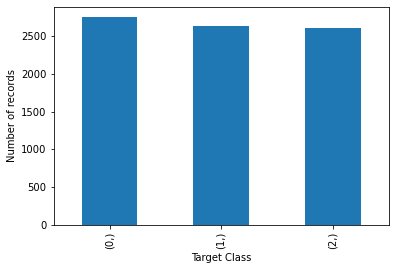

In [24]:

count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,1000, 1100],
              'max_features': ["sqrt", "log2", None],
              'max_depth': [10,20,40],
              'criterion' :['gini', 'entropy']
             }

rf_classication = RandomForestClassifier()
rf_classication_cv = GridSearchCV(rf_classication, parameters, cv = 10)
rf_classication_cv.fit(X_train, y_train)

In [27]:
print("Tuned Random Forest Parameters: {}".format(rf_classication_cv.best_params_))
print("Best score is {}".format(rf_classication_cv.best_score_))

Tuned Random Forest Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 100}
Best score is 0.34500000000000003


In [28]:
predictions_rf = rf_classication_cv.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions_rf, digits=3))

              precision    recall  f1-score   support

           0      0.352     0.353     0.352       706
           1      0.325     0.333     0.329       636
           2      0.336     0.327     0.331       658

    accuracy                          0.338      2000
   macro avg      0.338     0.338     0.338      2000
weighted avg      0.338     0.338     0.338      2000



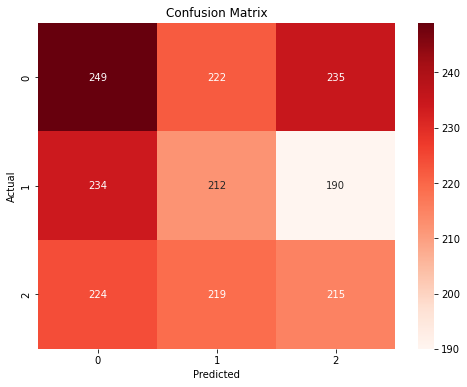

In [33]:
cm = confusion_matrix(y_test, predictions_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Decision Tree

In [36]:
parameters = {"criterion": ["gini", "entropy"],
              "splitter": ["best", "random"],
              "max_depth": np.arange(1, 10),
              "min_samples_leaf": np.arange(1, 10),
              "max_features": ["auto", "sqrt", "log2", None],
              "min_impurity_decrease": [0.0]
              }

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv = 10)
tree_cv.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 6, 'splitter': 'random'}
Best score is 0.35050000000000003


In [37]:
predictions_tree = tree_cv.predict(X_test)

In [38]:
print(classification_report(y_test, predictions_tree, digits=3))

              precision    recall  f1-score   support

           0      0.363     0.433     0.395       706
           1      0.296     0.296     0.296       636
           2      0.343     0.272     0.303       658

    accuracy                          0.337      2000
   macro avg      0.334     0.334     0.331      2000
weighted avg      0.335     0.337     0.333      2000



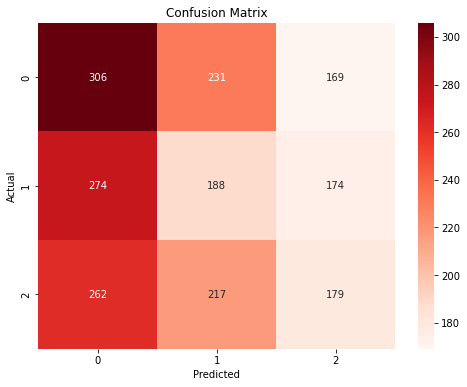

In [39]:
cm = confusion_matrix(y_test, predictions_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Try deep learning

In [40]:
df_dl = df.copy()

In [41]:
df_dl.head()

,age,gender,blood_type,medical_condition,admission_type,medication,test_result
0,1.508465,0,7,3,0,0,1
1,-0.839912,1,6,1,1,2,2
2,0.487431,1,5,5,1,2,2
3,-0.125189,1,5,1,2,4,0
4,-0.023086,1,7,0,2,3,2


In [55]:
X = df_dl.drop('test_result', axis=1)
y = df_dl[['test_result']]


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
import tensorflow as tf
model_dl = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y.shape[1], activation='softmax')
])

In [58]:
model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_dl.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3301 - val_loss: 0.0000e+00 - val_accuracy: 0.3180
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3301 - val_loss: 0.0000e+00 - val_accuracy: 0.3180
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3301 - val_loss: 0.0000e+00 - val_accuracy: 0.3180
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3301 - val_loss: 0.0000e+00 - val_accuracy: 0.3180
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3301 - val_loss: 0.0000e+00 - val_accuracy: 0.3180
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3301 - val_loss: 0.0000e+00 - val_accuracy: 0.3180
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3